In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
# For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq

In [ ]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 59.8MB/s]


In [ ]:
insurance_df=pd.read_csv("insurance.csv")

In [ ]:
insurance_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Checking for missing values

In [ ]:
insurance_df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
insurance_df.shape

(986, 11)

In [ ]:
insurance_df.isnull().any()

,0
Age,False
Diabetes,False
BloodPressureProblems,False
AnyTransplants,False
AnyChronicDiseases,False
Height,False
Weight,False
KnownAllergies,False
HistoryOfCancerInFamily,False
NumberOfMajorSurgeries,False


In [ ]:
insurance_df.duplicated().any()

False

Insights:
There are no missing values

Summary statistics

In [ ]:
insurance_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


# EDA

<Axes: >

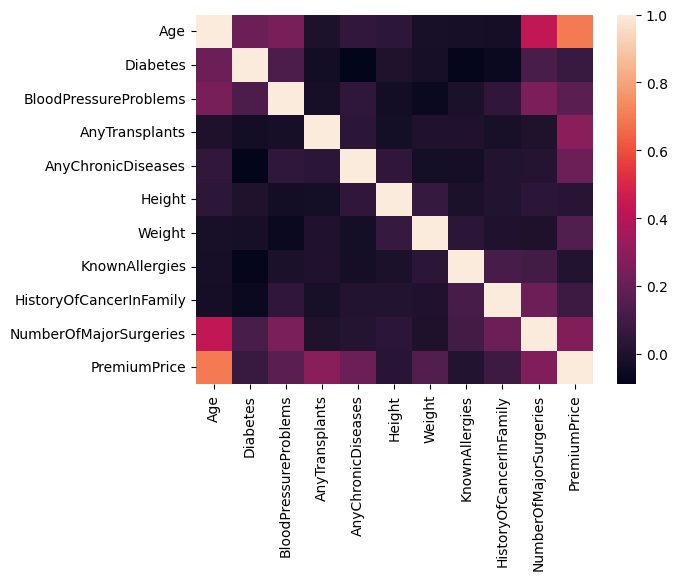

In [ ]:
sns.heatmap(insurance_df.corr())

<Axes: xlabel='PremiumPrice', ylabel='Density'>

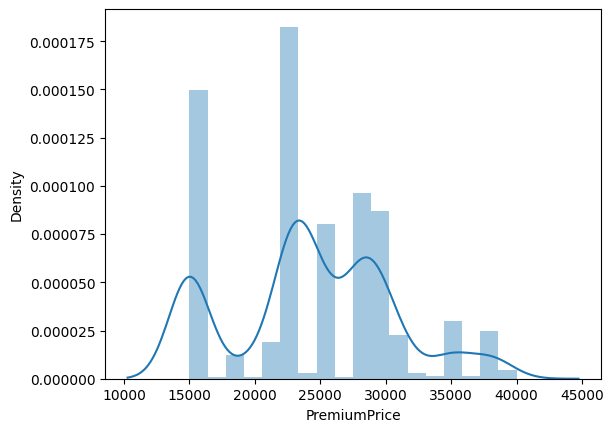

In [ ]:
sns.distplot(insurance_df['PremiumPrice'])

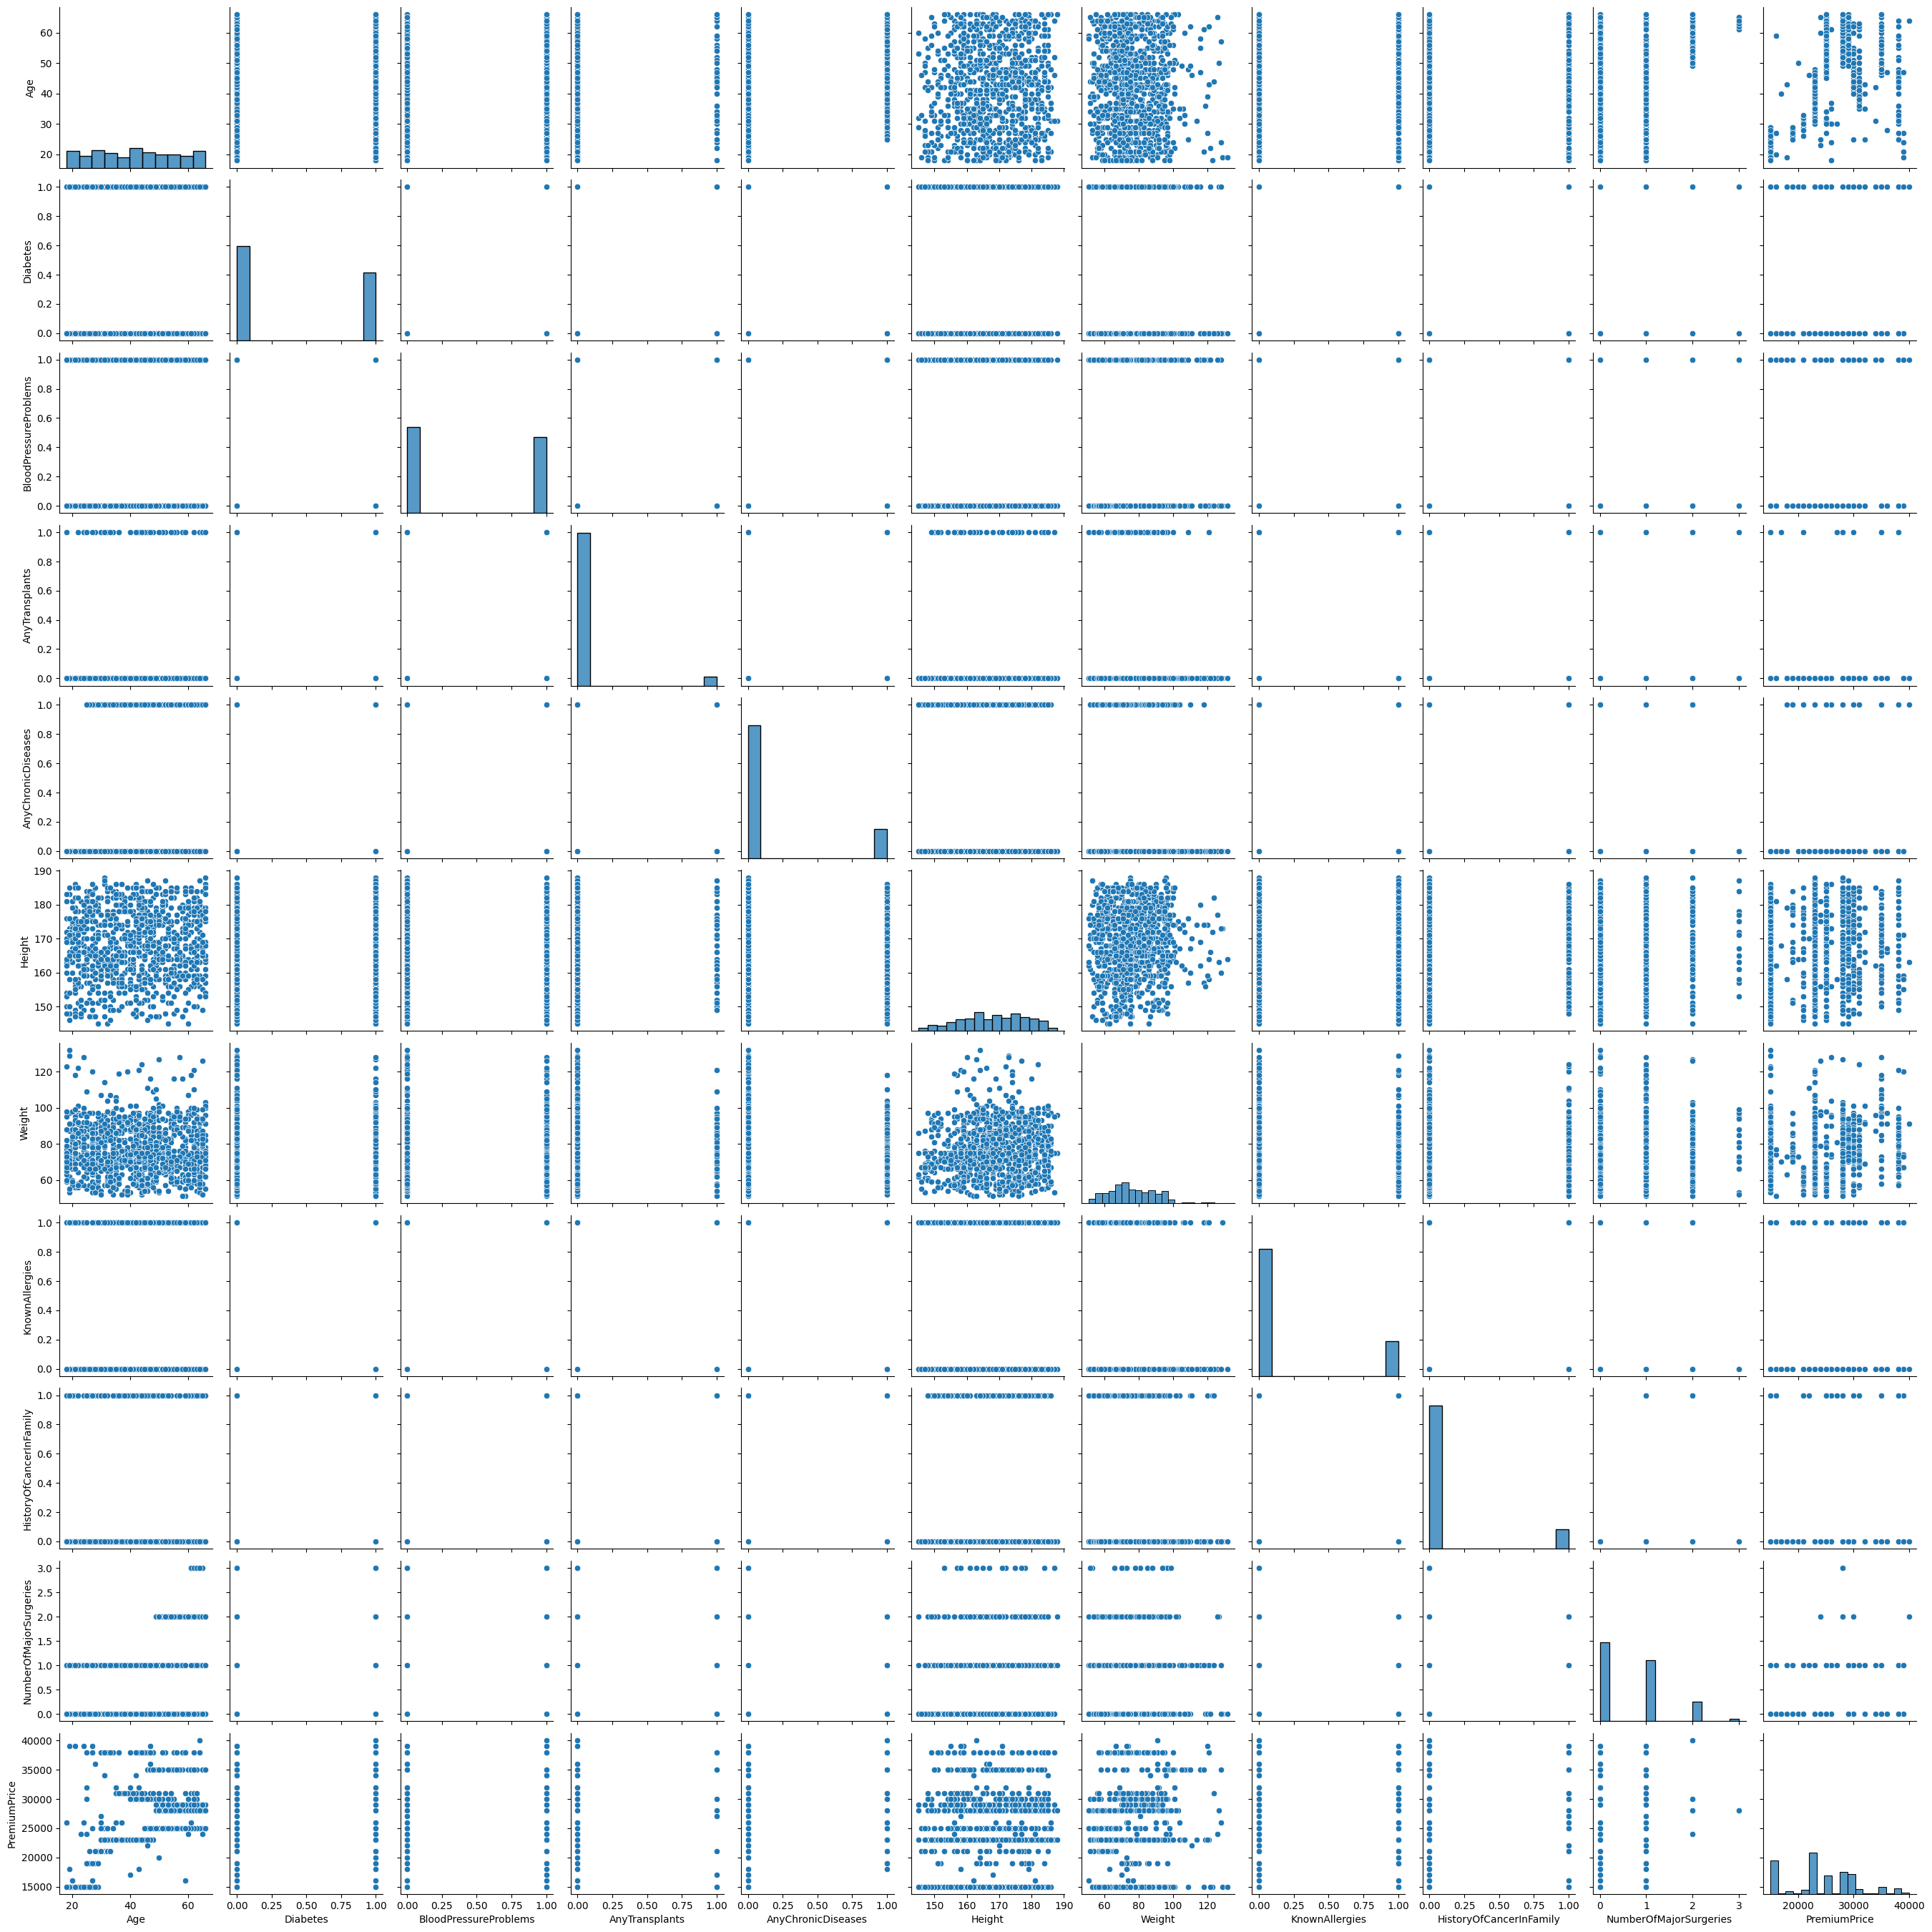

In [ ]:
#Plotting a pairplot to check out the relationship that exists between one column to another
sns.pairplot(insurance_df);

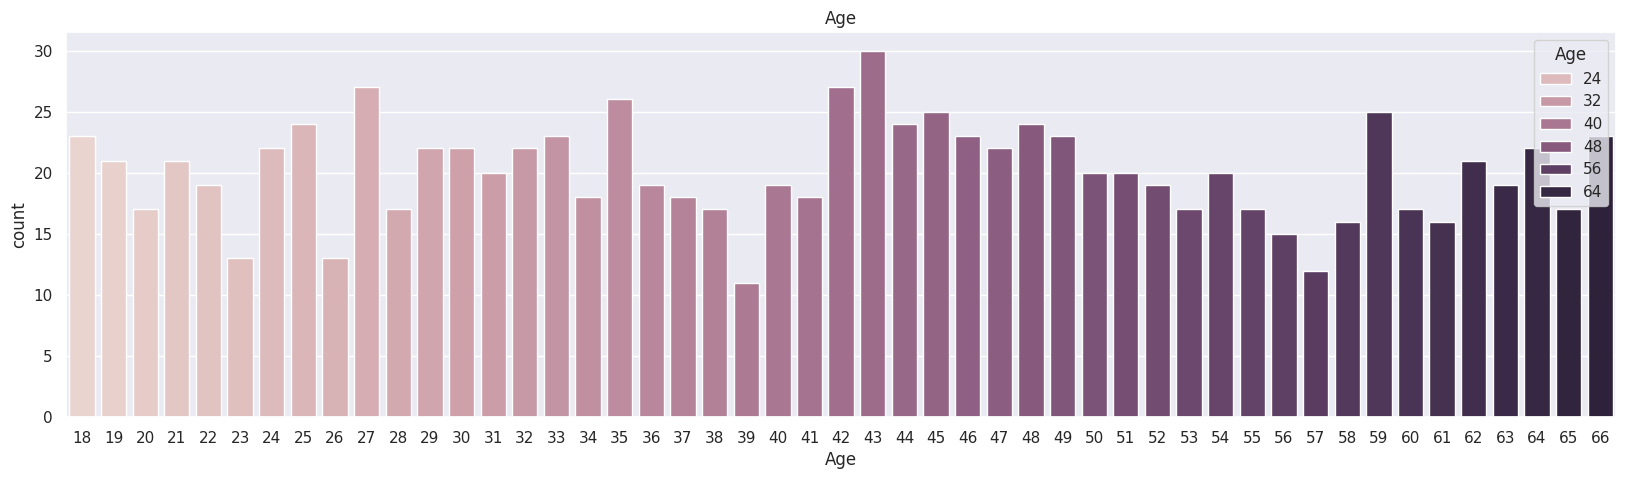

In [ ]:
plt.figure(figsize=(20 , 5))

sns.set(style="darkgrid")

sns.countplot(x="Age", data=insurance_df,hue="Age")

plt.title("Age")

plt.show()

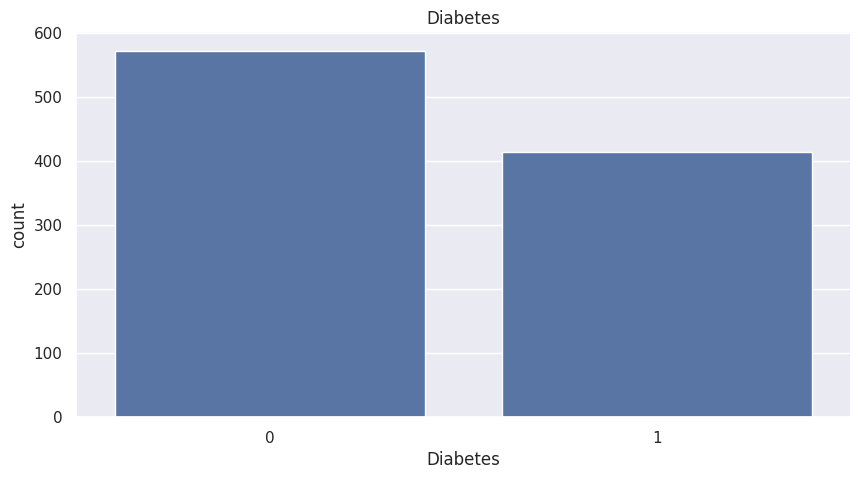

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="Diabetes", data=insurance_df)

plt.title("Diabetes")

plt.show()

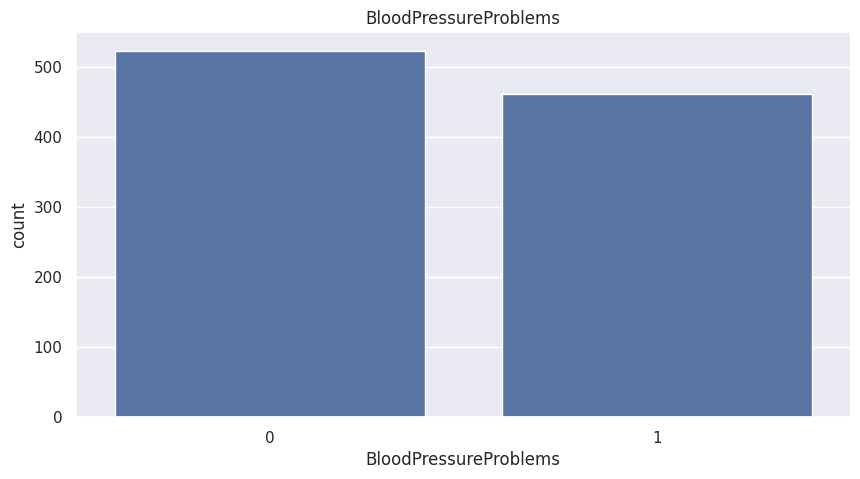

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="BloodPressureProblems", data=insurance_df)

plt.title("BloodPressureProblems")

plt.show()

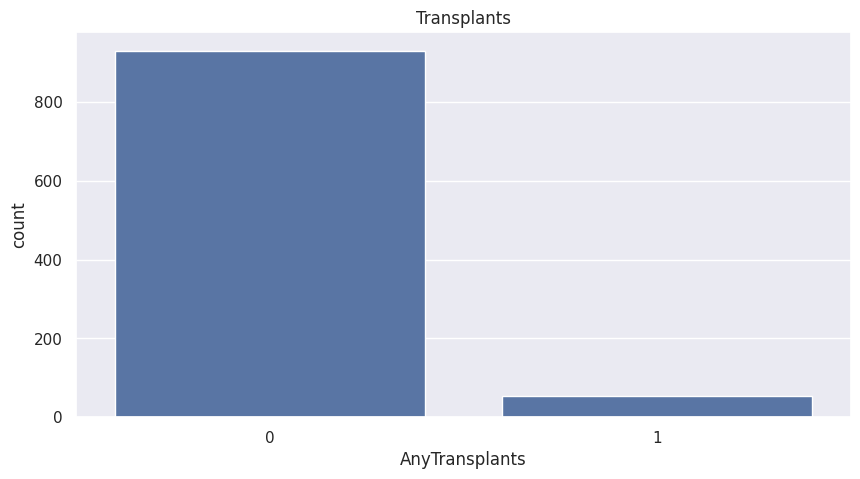

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="AnyTransplants", data=insurance_df)

plt.title("Transplants")

plt.show()

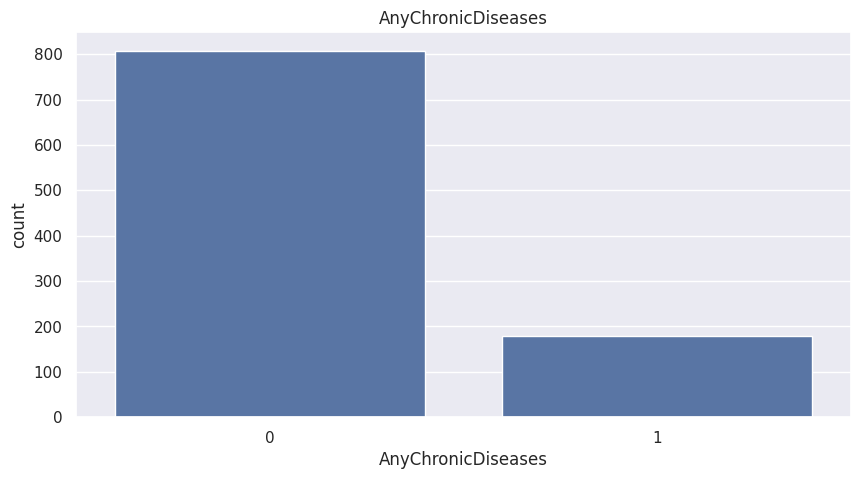

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="AnyChronicDiseases", data=insurance_df)

plt.title("AnyChronicDiseases")

plt.show()

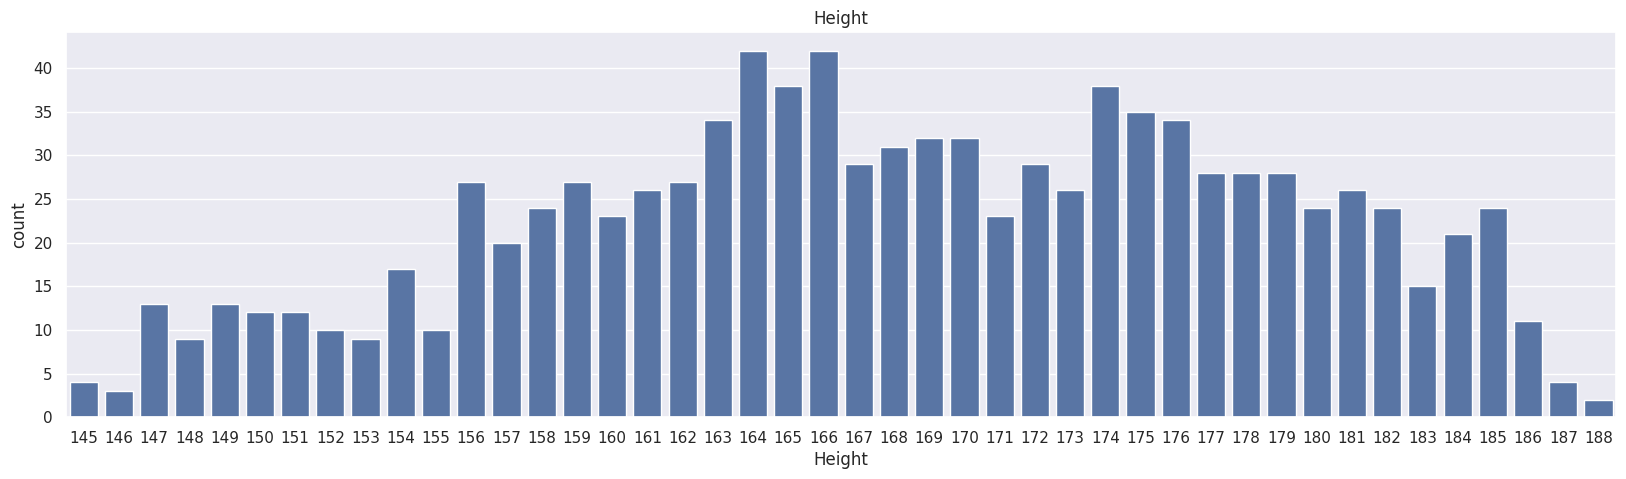

In [ ]:
plt.figure(figsize=(20 , 5))

sns.set(style="darkgrid")

sns.countplot(x="Height", data=insurance_df)

plt.title("Height")

plt.show()

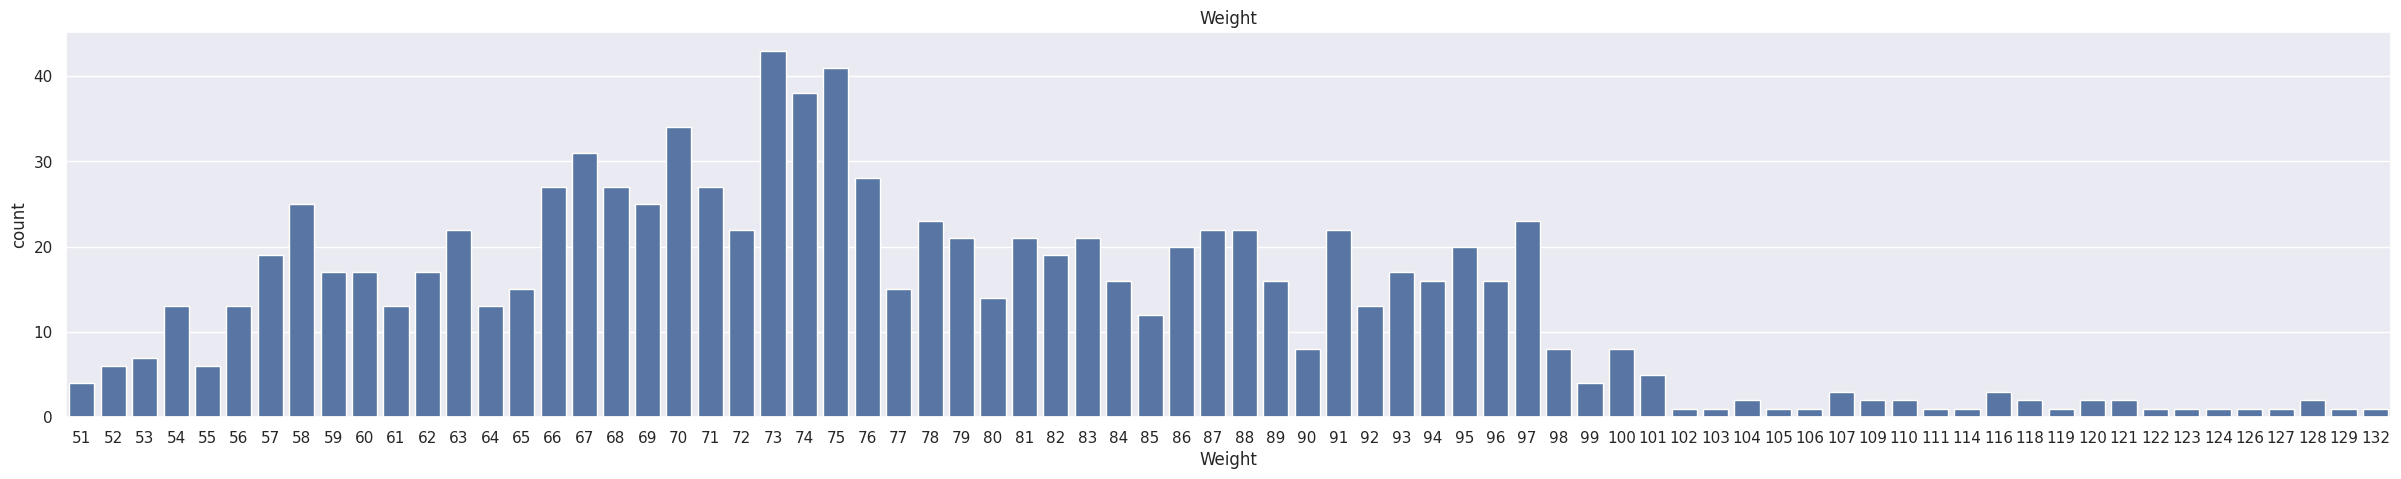

In [ ]:
plt.figure(figsize=(30 , 5))

sns.set(style="darkgrid")

sns.countplot(x="Weight", data=insurance_df)

plt.title("Weight")

plt.show()

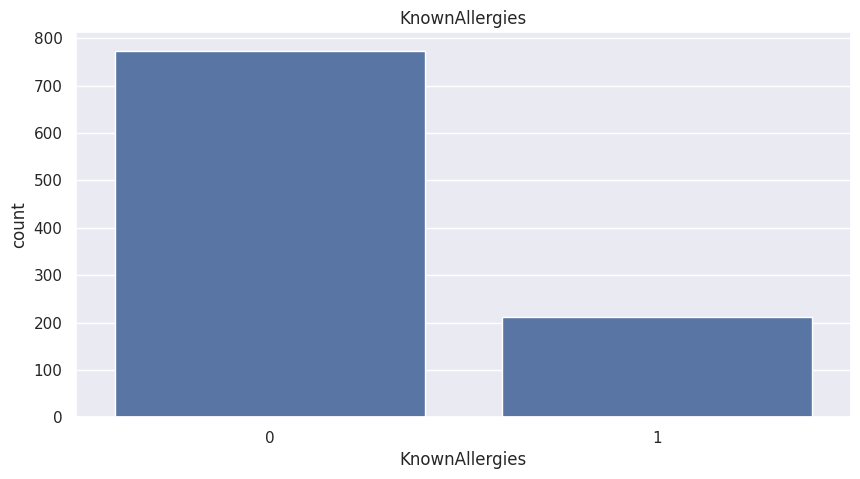

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="KnownAllergies", data=insurance_df)

plt.title("KnownAllergies")

plt.show()

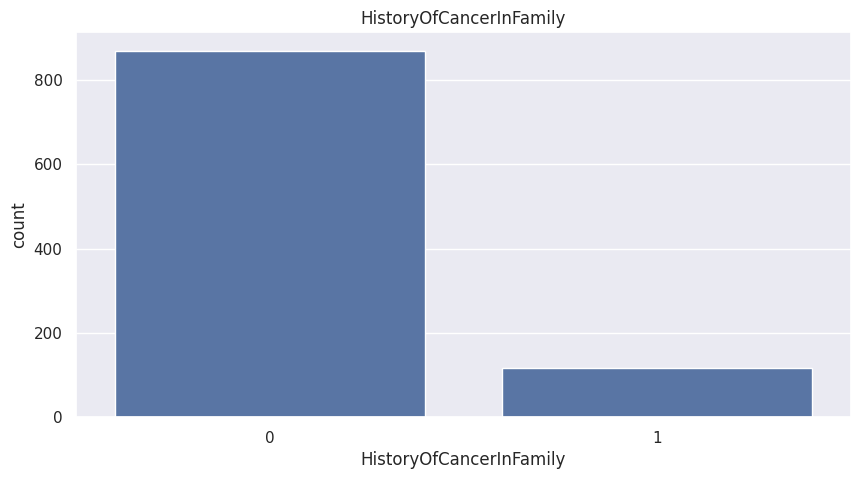

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="HistoryOfCancerInFamily", data=insurance_df)

plt.title("HistoryOfCancerInFamily")

plt.show()

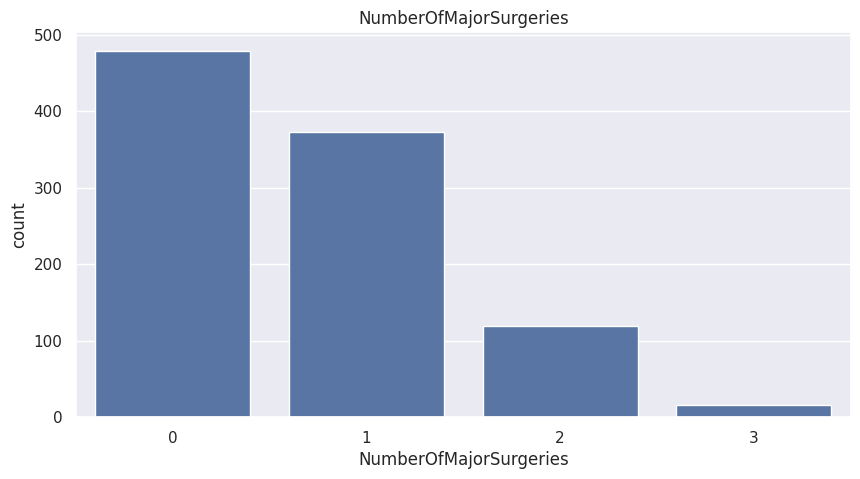

In [ ]:
plt.figure(figsize=(10 , 5))

sns.set(style="darkgrid")

sns.countplot(x="NumberOfMajorSurgeries", data=insurance_df)

plt.title("NumberOfMajorSurgeries")

plt.show()

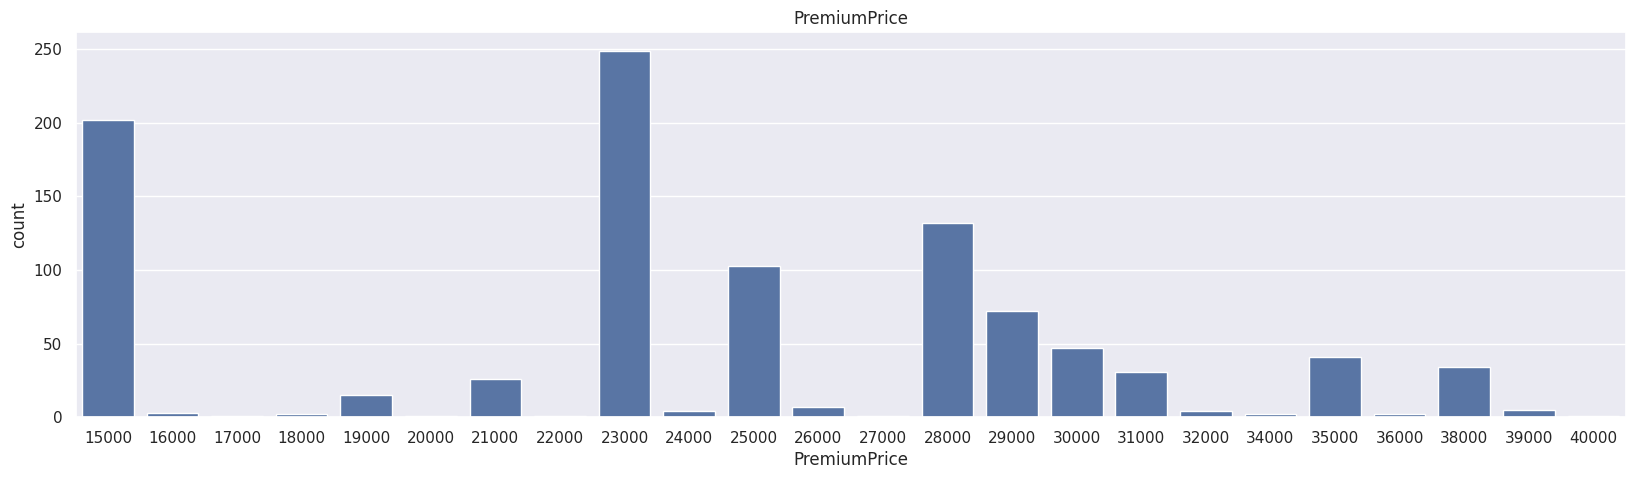

In [ ]:
plt.figure(figsize=(20 , 5))

sns.set(style="darkgrid")

sns.countplot(x="PremiumPrice", data=insurance_df)

plt.title("PremiumPrice")

plt.show()

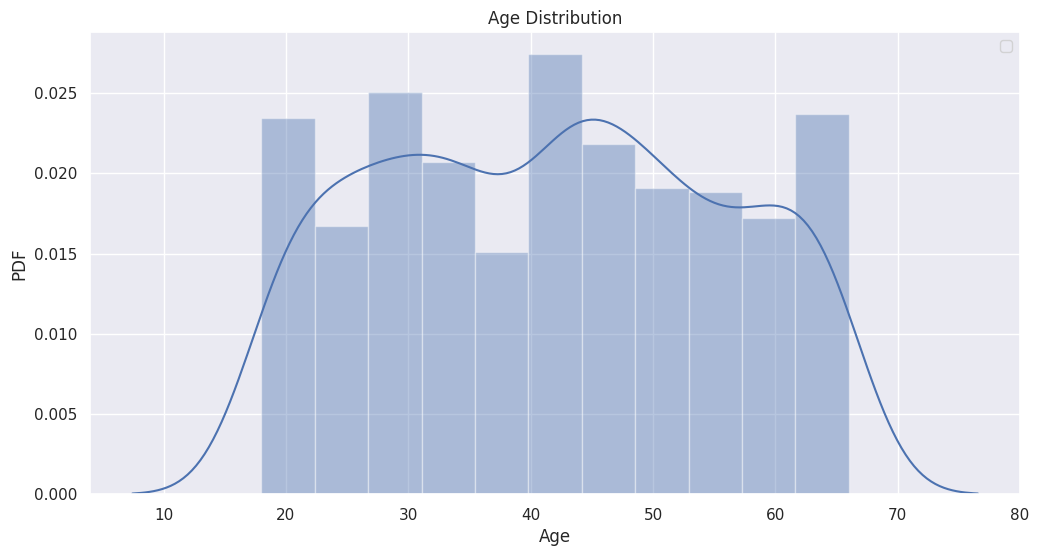

In [ ]:
# Age distribution

plt.figure(figsize=(12,6))

ax = sns.distplot(insurance_df['Age'])

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

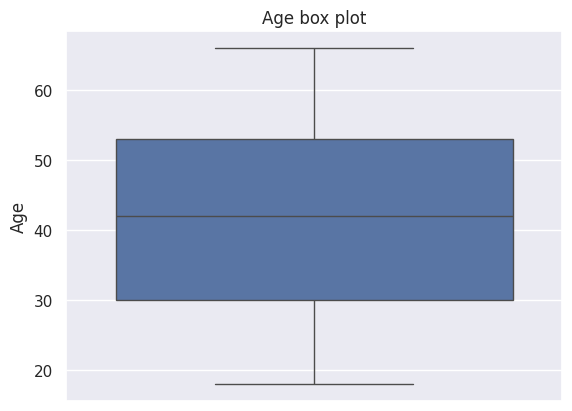

In [ ]:
sns.boxplot(y='Age',data=insurance_df)

plt.title("Age box plot")

plt.show()

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(insurance_df['Age'],i)))

0 percentile value is 18.0
10 percentile value is 22.0
20 percentile value is 27.0
30 percentile value is 32.0
40 percentile value is 37.0
50 percentile value is 42.0
60 percentile value is 46.0
70 percentile value is 50.5
80 percentile value is 56.0
90 percentile value is 62.0
100 percentile value is 66.0


In [ ]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(insurance_df['Age'],i)))

90 percentile value is 62.0
91 percentile value is 62.0
92 percentile value is 63.0
93 percentile value is 63.0
94 percentile value is 64.0
95 percentile value is 64.0
96 percentile value is 64.59999999999991
97 percentile value is 65.0
98 percentile value is 66.0
99 percentile value is 66.0
100 percentile value is 66.0


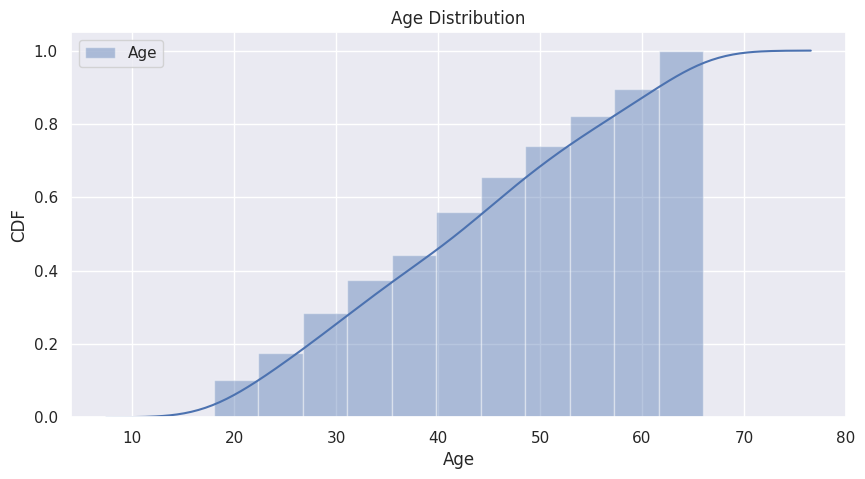

In [ ]:
# Age distribution cdf

plt.figure(figsize=(10,5))

kwargs = {'cumulative': True}

ax = sns.distplot(insurance_df['Age'],label="Age", hist_kws=kwargs, kde_kws=kwargs)

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='CDF')

plt.legend()

plt.show()

[Text(0.5, 1.0, 'Age vs PremiumPrice')]

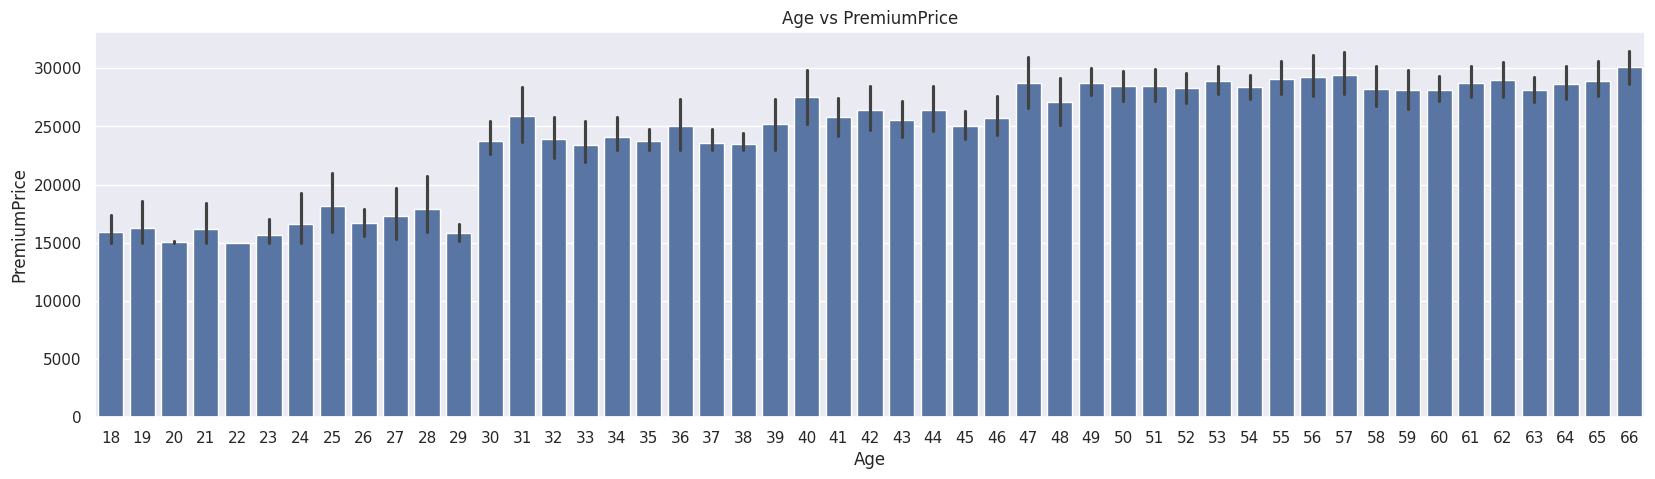

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x=insurance_df.Age,y=insurance_df.PremiumPrice).set(title="Age vs PremiumPrice")

[Text(0.5, 1.0, 'Diabetes vs PremiumPrice')]

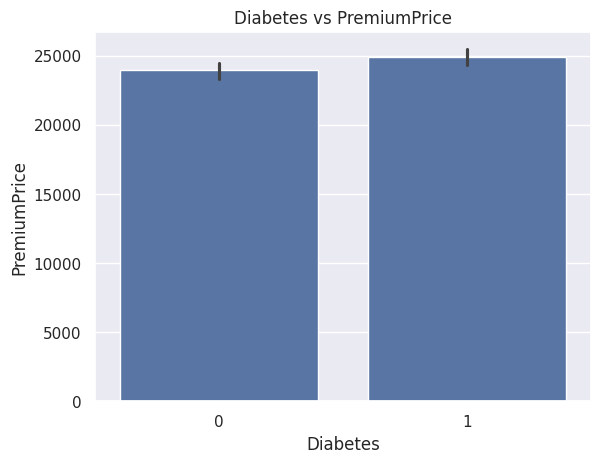

In [ ]:
sns.barplot(x=insurance_df.Diabetes,y=insurance_df.PremiumPrice).set(title="Diabetes vs PremiumPrice")

[Text(0.5, 1.0, 'BloodPressureProblems vs PremiumPrice')]

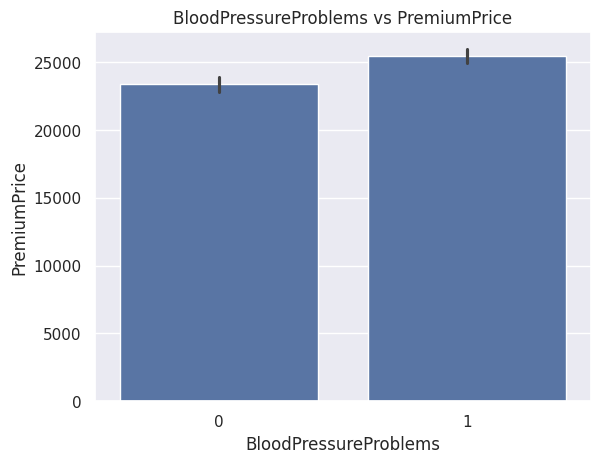

In [ ]:
sns.barplot(x=insurance_df.BloodPressureProblems,y=insurance_df.PremiumPrice).set(title="BloodPressureProblems vs PremiumPrice")

[Text(0.5, 1.0, 'AnyTransplants vs PremiumPrice')]

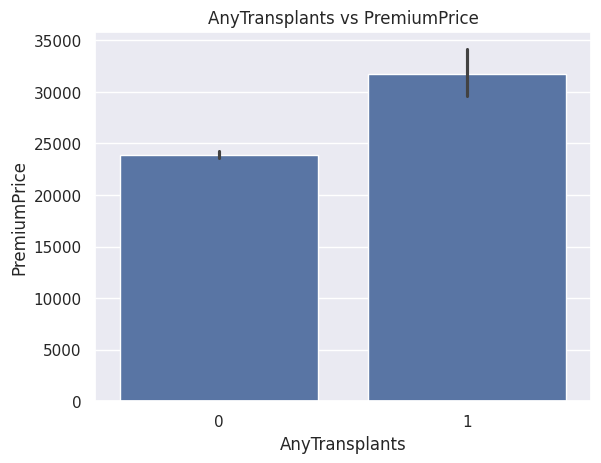

In [ ]:
sns.barplot(x=insurance_df.AnyTransplants,y=insurance_df.PremiumPrice).set(title="AnyTransplants vs PremiumPrice")

[Text(0.5, 1.0, 'AnyChronicDiseases vs PremiumPrice')]

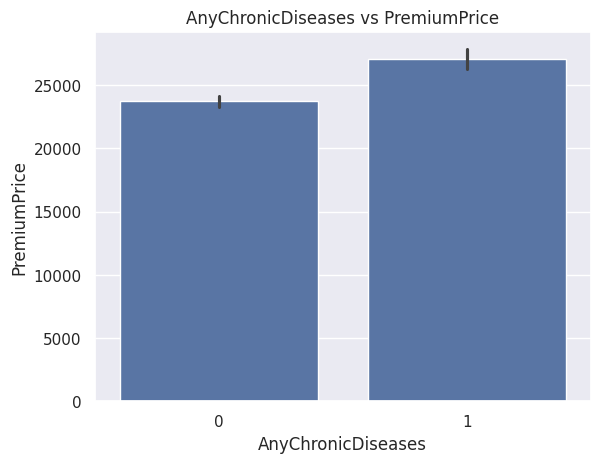

In [ ]:
sns.barplot(x=insurance_df.AnyChronicDiseases,y=insurance_df.PremiumPrice).set(title="AnyChronicDiseases vs PremiumPrice")

[Text(0.5, 1.0, 'HistoryOfCancerInFamily vs PremiumPrice')]

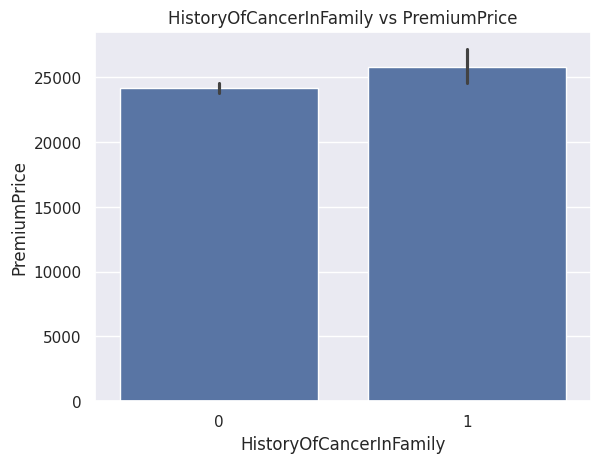

In [ ]:
sns.barplot(x=insurance_df.HistoryOfCancerInFamily,y=insurance_df.PremiumPrice).set(title="HistoryOfCancerInFamily vs PremiumPrice")

[Text(0.5, 1.0, 'NumberOfMajorSurgeries vs PremiumPrice')]

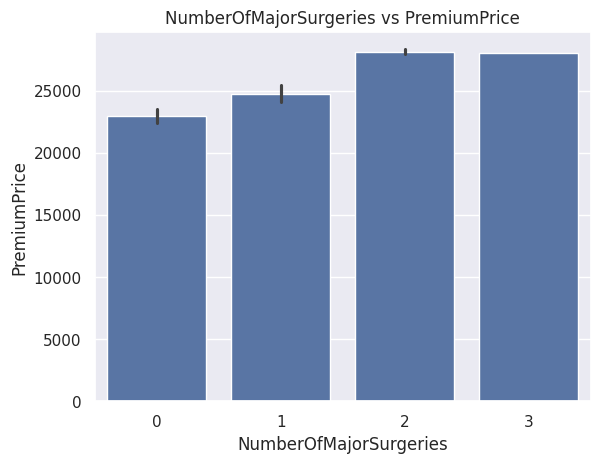

In [ ]:
sns.barplot(x=insurance_df.NumberOfMajorSurgeries,y=insurance_df.PremiumPrice).set(title="NumberOfMajorSurgeries vs PremiumPrice")

In [ ]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


[Text(0.5, 1.0, 'Diabetes vs NumberOfMajorSurgeries')]

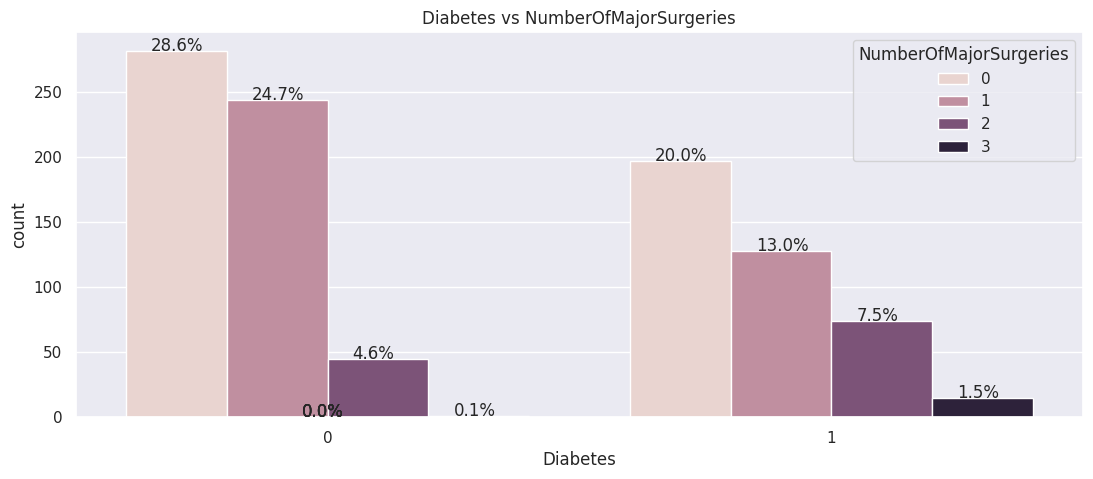

In [ ]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Diabetes',hue='NumberOfMajorSurgeries',data=insurance_df)
bar_perc(ax,insurance_df['NumberOfMajorSurgeries'])

ax.set(title="Diabetes vs NumberOfMajorSurgeries")

In [ ]:
insurance_df.groupby(['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases']).mean()['PremiumPrice'].unstack()

AnyChronicDiseases                                        0             1
Diabetes BloodPressureProblems AnyTransplants                            
0        0                     0               21278.225806  25352.941176
                               1               28307.692308  38000.000000
         1                     0               24396.648045  27658.536585
                               1               34250.000000  36000.000000
1        0                     0               23621.951220  29166.666667
                               1               32153.846154           NaN
         1                     0               24982.857143  26159.090909
                               1               20750.000000  29500.000000

In [ ]:
category1=pd.cut(insurance_df.Age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
insurance_df.insert(6,'AgeBin',category1)

[Text(0.5, 1.0, 'Age Vs PremiumPrice')]

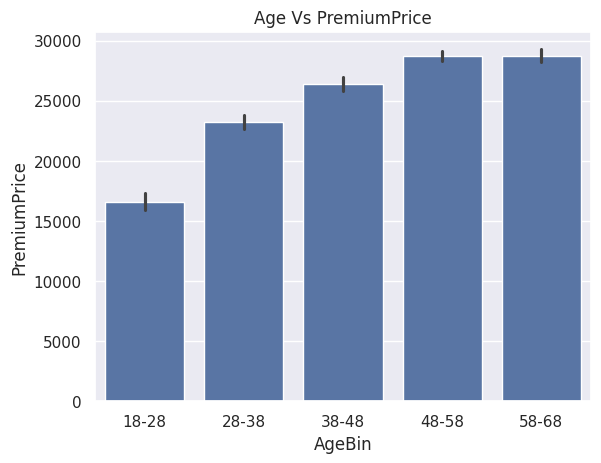

In [ ]:
sns.barplot(x=insurance_df.AgeBin,y=insurance_df.PremiumPrice).set(title='Age Vs PremiumPrice')

**Hypothesis Testing**

Setting up a function to return result on the basis of the significance value(0.05).

In [ ]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level:
        print('Reject NULL HYPOTHESIS')
    else:
        print('Fail to Reject NULL HYPOTHESIS')

For normality check, using Q-Q Plot

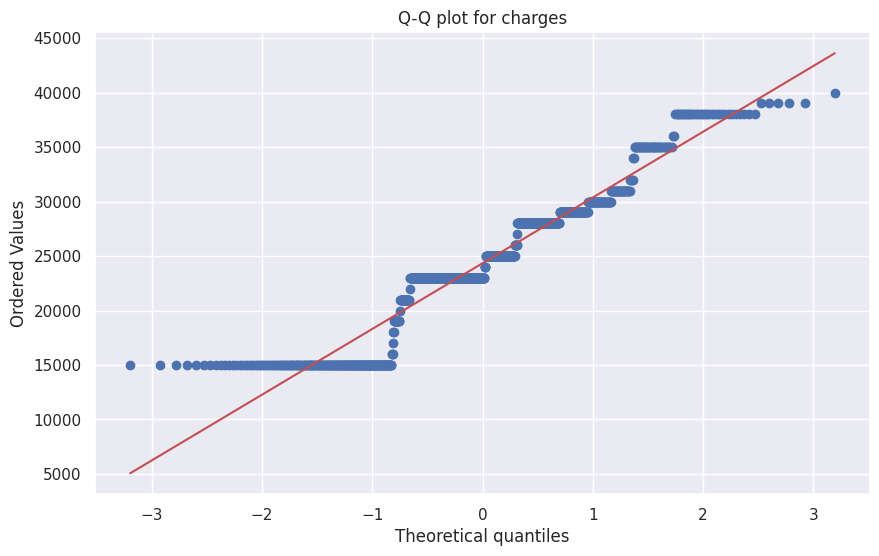

In [ ]:
plt.figure(figsize=(10,6))
stats.probplot(insurance_df['PremiumPrice'], plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

From the above graph we can say, the data points roughly fall along a straight diagonal line in a Q-Q plot, then the dataset likely follows a normal distribution.

**Homogeneity of Variances using Lavene's test**
Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

In [ ]:
diabetics = insurance_df[insurance_df['Diabetes']==1]['PremiumPrice']
non_diabetics = insurance_df[insurance_df['Diabetes']==0]['PremiumPrice']
stat,p = stats.levene(diabetics,non_diabetics)

In [ ]:
print('P-value :',p)

P-value : 0.008129129329867807


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


Performing Right tailed t-test

In [ ]:
st,p = stats.ttest_ind(diabetics,non_diabetics)
print('P-value :',(p/2))

P-value : 0.008345045692653055


In [ ]:
htResult(p/2)

Reject NULL HYPOTHESIS


**Answer**
We reject null hypothesis, which means the premiumprice for diabetics is more than non-diabetics.

In [ ]:
transplant = insurance_df[insurance_df['AnyTransplants']==1]['PremiumPrice']
non_transplant = insurance_df[insurance_df['AnyTransplants']==0]['PremiumPrice']
stat,p = stats.levene(diabetics,non_diabetics)

In [ ]:
print('P-value :',p)

P-value : 0.008129129329867807


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


In [ ]:
st,p = stats.ttest_ind(transplant,non_transplant)
print('P-value :',(p/2))

P-value : 9.893647711816386e-21


In [ ]:
htResult(p/2)

Reject NULL HYPOTHESIS


**Answer** We reject null hypothesis, which means the premiumprice for people with transplants is more than people with no transplants

In [ ]:
# Create a contingency table for 'Age' and another variable (e.g., 'Diabetes')
contingency_table = pd.crosstab(insurance_df['AnyChronicDiseases'], insurance_df['HistoryOfCancerInFamily'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 0.02062393388215223
P-value: 0.8858081638149811
Degrees of freedom: 1
Expected frequencies:
[[712.94117647  95.05882353]
 [157.05882353  20.94117647]]


P-value : Suggests that any observed differences are likely due to random variation, and there is no significant association.



In [ ]:
# Define predictors and target variable
X = insurance_df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
        'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = insurance_df['PremiumPrice']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          3.92e-210
Time:                        03:50:03   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5